In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import datetime as dt
import os
# import timeGPT 
from nixtla import NixtlaClient 

In [2]:
nixtla_client = NixtlaClient(
    api_key = 'nixak-WdmIlagFHllLhFFIYyGlGbVPbG52yXA7kioCxcr7xqlDnLvDWYoBAnpr1adwWEgzalYDtbcy2G7zFDx5'
)

nixtla_client.validate_api_key()

INFO:nixtla.nixtla_client:Happy Forecasting! :)


True

# Data Exploration

In [12]:
path = os.path.join(os.getcwd(), 'data')
print(os.listdir(path))

sales_filename = os.path.join(path, 'Bakery_Sales.csv')
price_filename = os.path.join(path, 'Bakery_price.csv')

print(sales_filename)
print(price_filename)

['.DS_Store', 'Bakery_price.csv', 'Bakery_Sales.csv', 'supermarket_sales.csv']
/Users/adamsmith/Desktop/HOBBIES/data-analysis-sandbox/time-series-sales/data/Bakery_Sales.csv
/Users/adamsmith/Desktop/HOBBIES/data-analysis-sandbox/time-series-sales/data/Bakery_price.csv


In [119]:
# import data into a dataframe 
df = pd.read_csv(sales_filename)
prices = pd.read_csv(price_filename)

df.head()                 

,datetime,day of week,total,place,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,croque monsieur,mad garlic,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,2019-07-11 15:35,Thur,23800.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,2019-07-11 16:10,Thur,15800.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,2019-07-12 11:49,Fri,58000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-07-13 13:19,Sat,14800.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,2019-07-13 13:22,Sat,15600.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
print(len(df))

2654


In [127]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [128]:
print(f'Date range: {df.datetime.min()} to {df.datetime.max()}')

Date range: 2019-07-11 15:35:00 to 2020-06-18 14:52:00


In [129]:
delta_date = df.datetime.max() - df.datetime.min()
print(f'Data is for {delta_date.days} days')

Data is for 342 days


In [29]:
# check the prices 
prices.head()

,Name,price
0,angbutter,4800
1,plain bread,3500
2,jam,1500
3,ice coffe,4000
4,croissant,3500


In [130]:
# get non-NAN for the first row
order = df.iloc[0][~df.iloc[0].isna()]
print(order)

datetime              2019-07-11 15:35:00
day of week                          Thur
total                             23800.0
angbutter                             1.0
americano                             1.0
tiramisu croissant                    3.0
vanila latte                          1.0
Name: 0, dtype: object


In [ ]:
# check if the order adds to the total sales
total = 0
for key in order.keys():
    if (key != 'datetime') and (key != 'total') and (key != 'day of week'):
        quantity = order[key]
        print(key)
        price = prices[prices['Name'] == key].price.values
        print(price)
        total += quantity 

print(f'Total: {total}')

angbutter
['4800']
americano
[]
tiramisu croissant
['4800']
vanila latte
[]
Total: 6.0


There are some inconsistencies with the names in prices and in the sales dataset. Will need to clean up the data

# Cleaning up the dataset

# Plot the sales over time

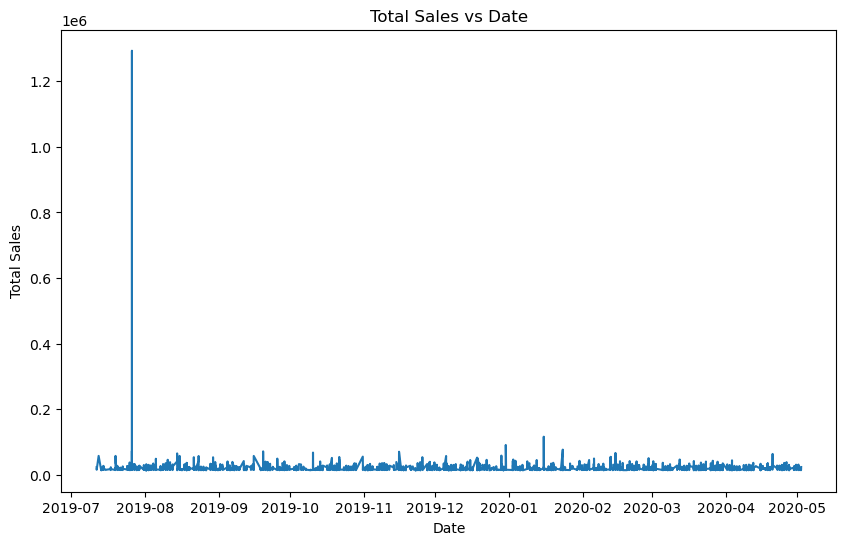

In [131]:
# plot the sales 
plt.figure(figsize=(10, 6))
plt.plot(df.datetime, df['total'])
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales vs Date')
plt.show()

In [134]:
# check the large value 
df[df['total'] > 100_000]

,datetime,day of week,total,place,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,croque monsieur,mad garlic,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
89,2019-07-26 11:36:00,Fri,1293000.0,NaN,6.0,5.0,NaN,NaN,5.0,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1444,2020-01-15 11:28:00,Wed,116500.0,석사동,10.0,NaN,NaN,NaN,NaN,NaN,10.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
# convert korean to CAD
df['total'] = df['total'] * 0.00099

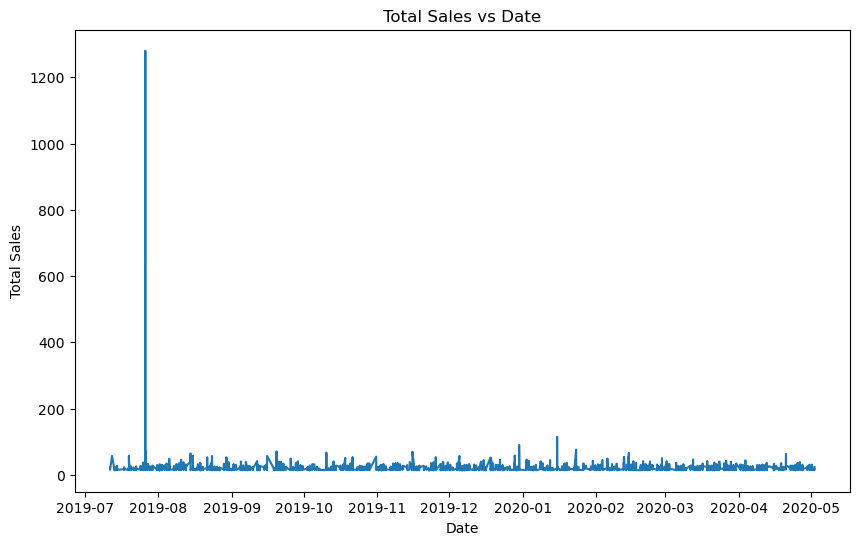

In [136]:
plt.figure(figsize=(10, 6))
plt.plot(df.datetime, df['total'])
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales vs Date')
plt.show()

In [137]:
df[df['total'] > 200]

,datetime,day of week,total,place,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,croque monsieur,mad garlic,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
89,2019-07-26 11:36:00,Fri,1280.07,NaN,6.0,5.0,NaN,NaN,5.0,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


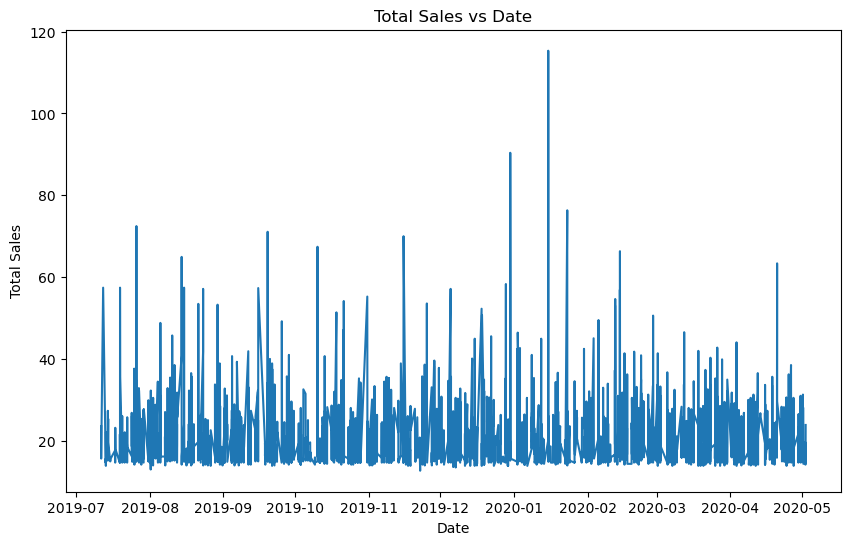

In [138]:
# remove the large value
df = df[df['total'] < 200]

plt.figure(figsize=(10, 6))
plt.plot(df.datetime, df['total'])
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales vs Date')
plt.show()

In [ ]:
# check the sames for a single day

# create a day column without the time
df['day'] = df['datetime'].dt.date

# create a month column
df['month'] = df['datetime'].dt.month

# get the sales for a single day
single_day = df[df['day'] == dt.date(2019, 7, 20)]

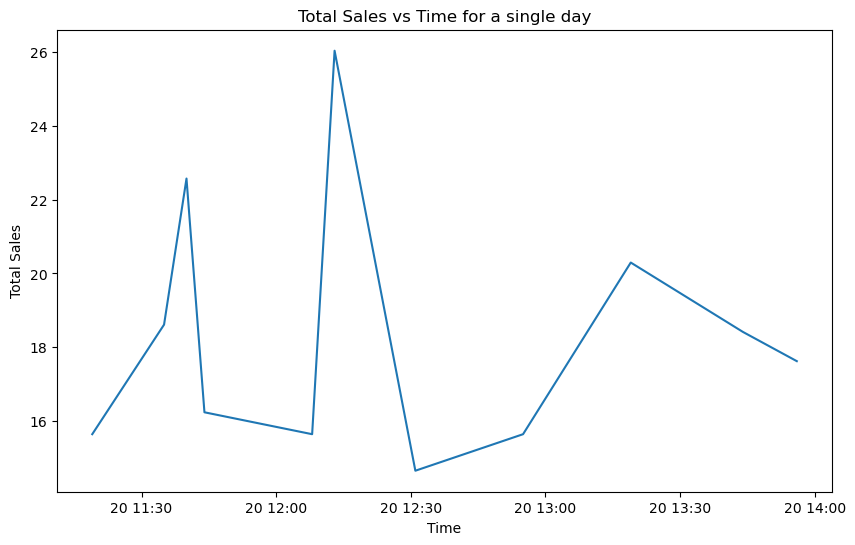

In [149]:
# plot the sales for the single day

plt.figure(figsize=(10, 6))
plt.plot(single_day.datetime, single_day['total'])
plt.xlabel('Time')
plt.ylabel('Total Sales')
plt.title('Total Sales vs Time for a single day')
plt.show()

In [150]:
single_day.total.sum()

201.36599999999999

In [152]:
df.groupby('day')

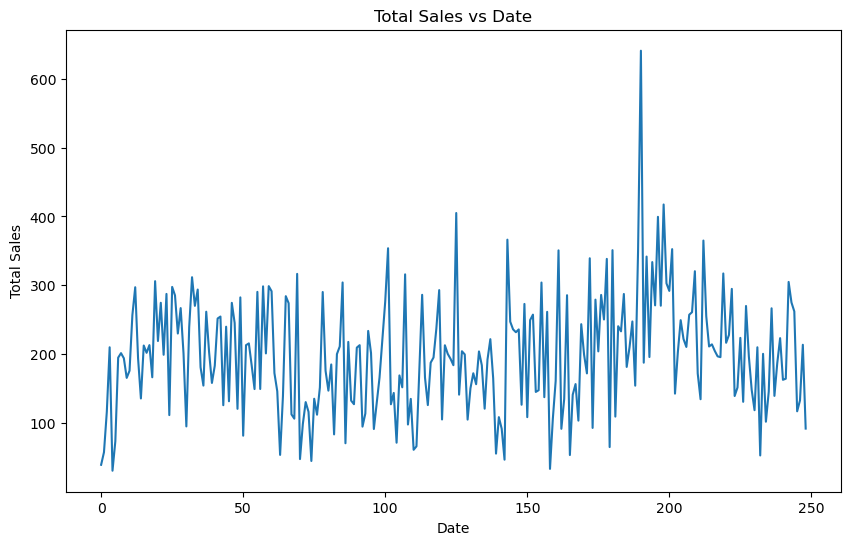

In [153]:
# plot the daily sales 
daily_sales = df.groupby('day', as_index=False).sum(numeric_only=True)


plt.figure(figsize=(10, 6))
plt.plot(daily_sales.index, daily_sales['total'])
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales vs Date')
plt.show()

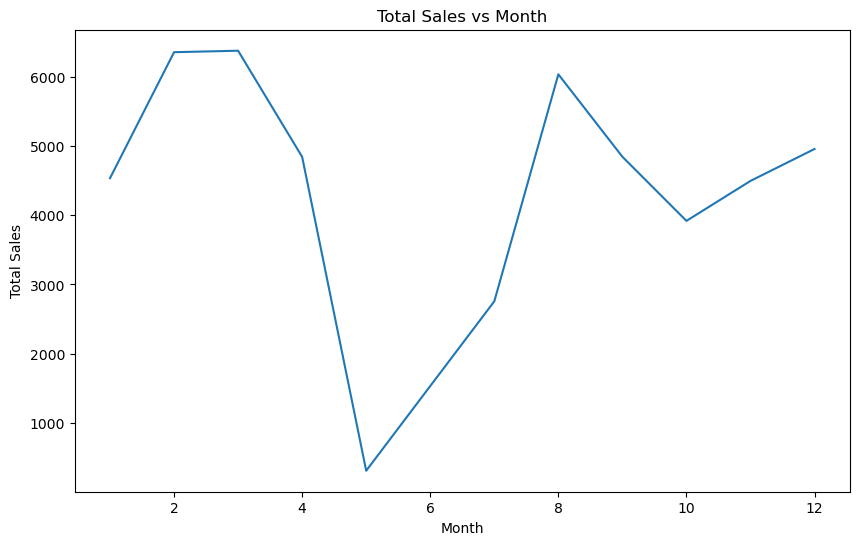

In [156]:
# plot the monthly sales
monthly_sales = df.groupby('month', as_index=False).sum(numeric_only=True)

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['month'], monthly_sales['total'])
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales vs Month')
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


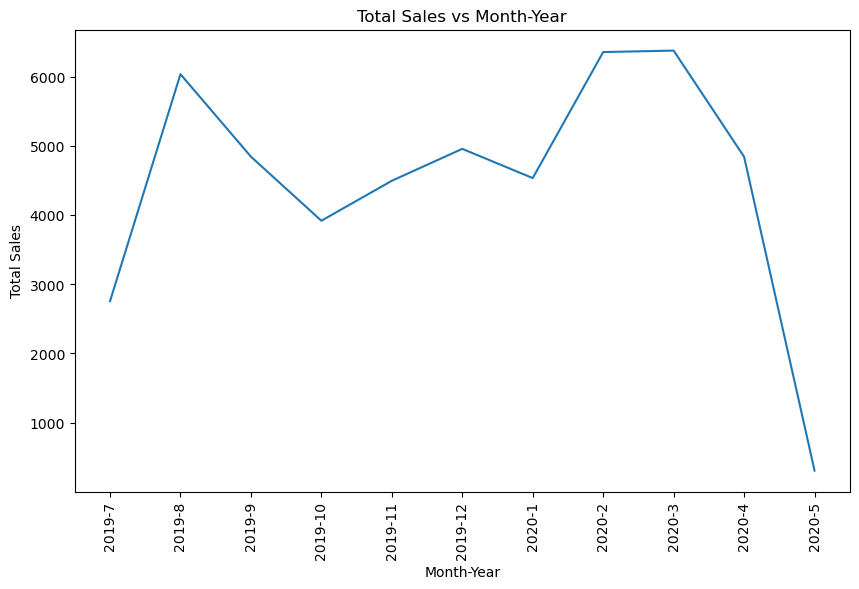

In [157]:
# plot the monthly average sales over the years 
df['year'] = df['datetime'].dt.year
monthly_sales = df.groupby(['year', 'month'], as_index=False).sum(numeric_only=True)

monthly_sales['month_year'] = monthly_sales['year'].astype(str) + '-' + monthly_sales['month'].astype(str)

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['month_year'], monthly_sales['total'])
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.title('Total Sales vs Month-Year')
plt.xticks(rotation=90)
plt.show()

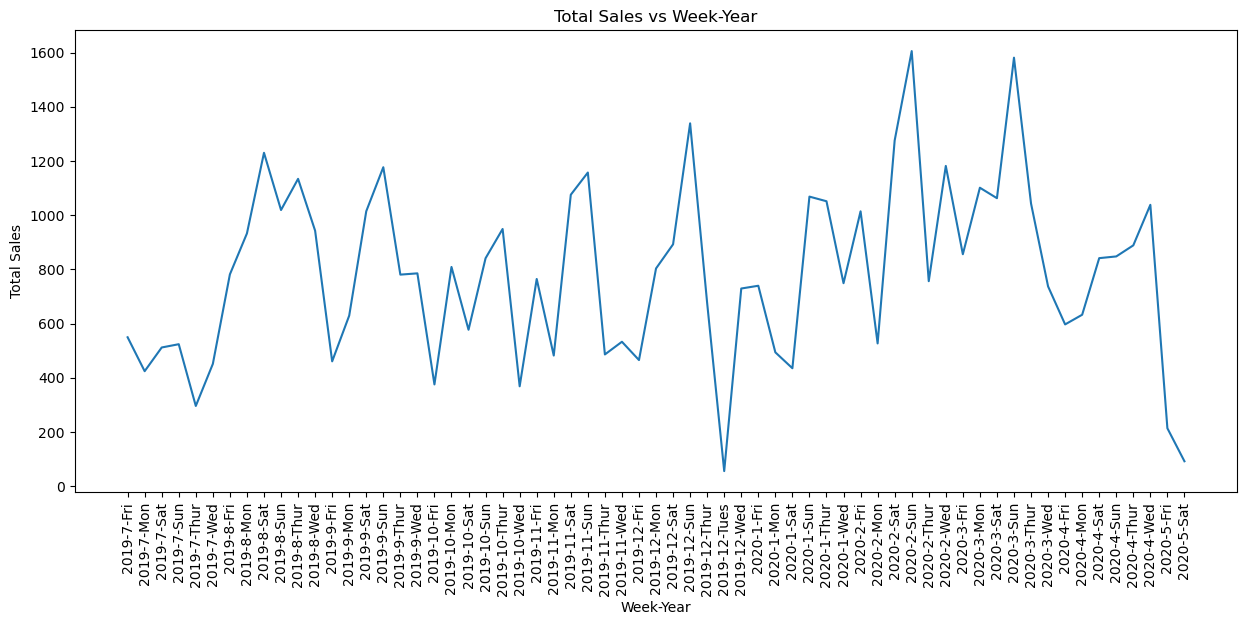

In [161]:
# day of week average sales
weekly_sales = df.groupby(['year', 'month', 'day of week'], as_index=False).sum(numeric_only=True)

weekly_sales['week_year'] = weekly_sales['year'].astype(str) + '-' + weekly_sales['month'].astype(str) + '-' + weekly_sales['day of week'].astype(str)

plt.figure(figsize=(15, 6))
plt.plot(weekly_sales['week_year'], weekly_sales['total'])
plt.xlabel('Week-Year')
plt.ylabel('Total Sales')
plt.title('Total Sales vs Week-Year')
plt.xticks(rotation=90)
plt.show()

In [165]:
# count the number of each day that they are open
df['day of week'].value_counts()


day of week
Sun     554
Sat     452
Thur    385
Wed     360
Fri     333
Mon     332
Tues      3
Name: count, dtype: int64

They are normally closed on tuesdays